In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

%matplotlib inline

1 = DOS, 0 =DDOS

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Project Title : Comprehensive Analysis of Botnet Behavior in IoT Networks: Patterns, Impacts, and Detection Using Machine Learning

## Group Members:
### 1. Ankur Kaushal
### 2. Dyuti Dasmahapatra
### 3. Yash Verma
### 4. Priyanshu Yadav

## Objective:
### 1. Gain insights into botnet behavior and characteristics within IoT networks through an in-depth analysis of attack patterns, features, and impacts.
### 2. Develop accurate detection mechanisms using machine learning to identify various types of botnet attacks in IoT networks.



## 1. Data Understanding

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/file.csv")

In [ ]:
data.head(10)

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,DoS,TCP
5,420025,tcp,192.168.100.149,39733,192.168.100.5,80,156396,2.177835,36,0.000000,3,1.539962,36,0.000000,0.127912,4.619887,DoS,TCP
6,3008812,udp,192.168.100.147,10800,192.168.100.3,80,118034,1.368196,100,1.975180,4,3.910081,100,0.000000,1.025120,4.885159,DDoS,UDP
7,1064106,udp,192.168.100.150,19625,192.168.100.3,80,184672,1.788452,100,0.000000,4,3.576574,100,0.000000,0.446612,4.492080,DoS,UDP
8,3258414,udp,192.168.100.147,22692,192.168.100.3,80,105486,0.822443,100,2.980030,4,3.982845,100,0.000000,1.003092,4.994536,DDoS,UDP
9,1793063,tcp,192.168.100.148,39738,192.168.100.3,80,141822,0.030759,73,0.143091,1,0.173851,100,0.103113,0.309338,0.204610,DDoS,TCP


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715421 entries, 0 to 733704
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            715421 non-null  int64  
 1   proto              715421 non-null  object 
 2   saddr              715421 non-null  object 
 3   sport              715421 non-null  object 
 4   daddr              715421 non-null  object 
 5   dport              715421 non-null  object 
 6   seq                715421 non-null  int64  
 7   stddev             715421 non-null  float64
 8   N_IN_Conn_P_SrcIP  715421 non-null  int64  
 9   min                715421 non-null  float64
 10  state_number       715421 non-null  int64  
 11  mean               715421 non-null  float64
 12  N_IN_Conn_P_DstIP  715421 non-null  int64  
 13  drate              715421 non-null  float64
 14  srate              715421 non-null  float64
 15  max                715421 non-null  float64
 16  categor

In [ ]:
data_shape = data.shape
print(f"There are {data_shape[0]} rows and {data_shape[1]} columns.")


There are 715421 rows and 18 columns.


In [ ]:
data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
count,7.154210e+05,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000,715421.000000
mean,1.788778e+06,124191.245894,0.910528,82.958577,1.044280,3.157682,2.289794,92.657325,0.005943,0.508327,3.099481
std,1.032453e+06,74726.423415,0.801447,23.865941,1.494253,1.157072,1.494513,17.771227,0.079117,0.994016,1.820699
min,2.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.942840e+05,59538.000000,0.040979,70.000000,0.000000,3.000000,0.287563,100.000000,0.000000,0.167201,0.368124
50%,1.788442e+06,121144.000000,0.825185,100.000000,0.000000,4.000000,2.704383,100.000000,0.000000,0.287382,4.029627
75%,2.684075e+06,186888.000000,1.752374,100.000000,2.509574,4.000000,3.575121,100.000000,0.000000,0.489954,4.309436
max,3.576880e+06,262212.000000,2.496758,100.000000,4.980470,7.000000,4.981785,100.000000,42.667576,200.787308,4.999999


In [ ]:
data["proto"].value_counts()

proto
udp     396560
tcp     318834
arp         19
icmp         8
Name: count, dtype: int64

In [ ]:
data["subcategory"].value_counts()

subcategory
UDP     396580
TCP     318337
HTTP       504
Name: count, dtype: int64

In [ ]:
data["state_number"].value_counts()

state_number
4    396560
3    175523
1    142832
7       479
2        19
5         8
Name: count, dtype: int64

In [ ]:
data["category"].value_counts()

category
DDoS    385309
DoS     330112
Name: count, dtype: int64

## 2. Data Pre-processing

In [ ]:
encoded_df = data.copy()

label_encoders = {}
categorical_columns = ['category','subcategory','proto']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])

encoded_df.head()


,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
0,792371,3,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,2
1,2056418,2,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,0,1
2,2795650,3,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,0,2
3,2118009,2,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,0,1
4,303688,2,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,1


In [ ]:
encoded_df['sport'] = pd.to_numeric(encoded_df['sport'], errors='coerce')
encoded_df['dport'] = pd.to_numeric(encoded_df['dport'], errors='coerce')
encoded_df['daddr'] = pd.to_numeric(encoded_df['daddr'], errors='coerce')
encoded_df['saddr'] = pd.to_numeric(encoded_df['saddr'], errors='coerce')

In [ ]:
encoded_df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
0,792371,3,NaN,48516.0,NaN,80.0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,2
1,2056418,2,NaN,22267.0,NaN,80.0,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,0,1
2,2795650,3,NaN,28629.0,NaN,80.0,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,0,2
3,2118009,2,NaN,42142.0,NaN,80.0,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,0,1
4,303688,2,NaN,1645.0,NaN,80.0,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,1


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715421 entries, 0 to 733704
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            715421 non-null  int64  
 1   proto              715421 non-null  int64  
 2   saddr              0 non-null       float64
 3   sport              715413 non-null  float64
 4   daddr              0 non-null       float64
 5   dport              715413 non-null  float64
 6   seq                715421 non-null  int64  
 7   stddev             715421 non-null  float64
 8   N_IN_Conn_P_SrcIP  715421 non-null  int64  
 9   min                715421 non-null  float64
 10  state_number       715421 non-null  int64  
 11  mean               715421 non-null  float64
 12  N_IN_Conn_P_DstIP  715421 non-null  int64  
 13  drate              715421 non-null  float64
 14  srate              715421 non-null  float64
 15  max                715421 non-null  float64
 16  categor

In [ ]:
print("No. of null values")
encoded_df.isnull().sum()

No. of null values


pkSeqID                   0
proto                     0
saddr                715421
sport                     8
daddr                715421
dport                     8
seq                       0
stddev                    0
N_IN_Conn_P_SrcIP         0
min                       0
state_number              0
mean                      0
N_IN_Conn_P_DstIP         0
drate                     0
srate                     0
max                       0
category                  0
subcategory               0
dtype: int64

In [ ]:
encoded_df = encoded_df.drop(columns=['saddr','daddr'])

In [ ]:
encoded_df= encoded_df.dropna()

In [ ]:
print("No. of null values")
encoded_df.isnull().sum()

No. of null values


pkSeqID              0
proto                0
sport                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
category             0
subcategory          0
dtype: int64

In [ ]:
encoded_df = encoded_df.rename(columns={'category': 'target'})

target_column = encoded_df.pop('target')
encoded_df['target'] = target_column

In [ ]:
encoded_df.shape

(715413, 16)

In [ ]:
df.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory,target
0,792371,3,48516.0,80.0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,2,1
1,2056418,2,22267.0,80.0,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,0
2,2795650,3,28629.0,80.0,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,2,0
3,2118009,2,42142.0,80.0,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,0
4,303688,2,1645.0,80.0,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,1


In [ ]:
df = encoded_df

## 3. Exploratory Data Analytics

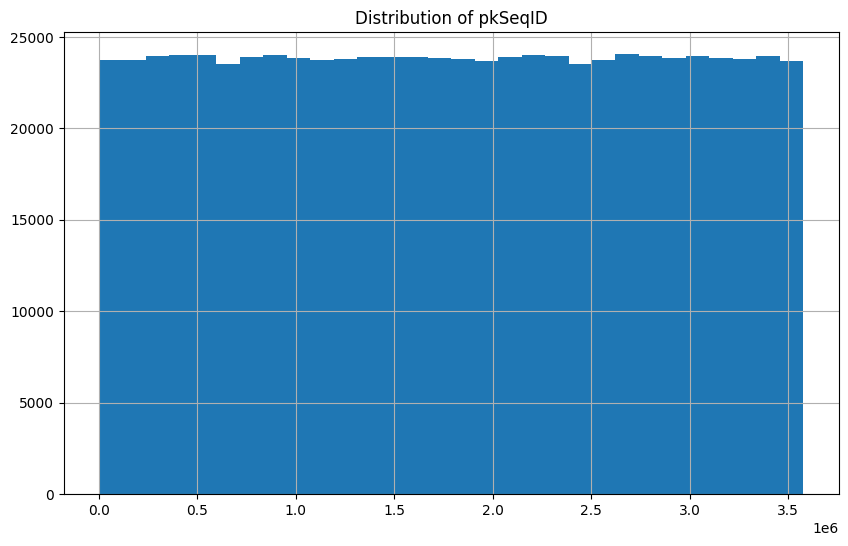

In [ ]:
plt.figure(figsize=(10, 6))
df['pkSeqID'].hist(bins=30)
plt.title('Distribution of pkSeqID')
plt.show()

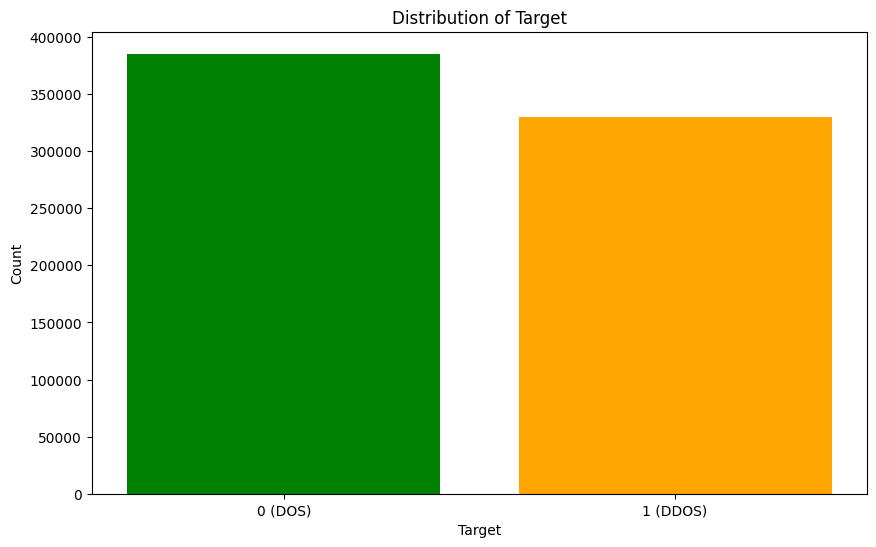

In [ ]:
colors = ['orange' if x == 1 else 'green' for x in df['target'].unique()]
colormap = dict(zip(df['target'].unique(), colors))

target_labels = {0: '0 (DDOS)', 1: '1 (DOS)'}

plt.figure(figsize=(10, 6))
value_counts = df['target'].value_counts()
bars = plt.bar(value_counts.index, value_counts.values, color=[colormap[x] for x in value_counts.index])

plt.xticks(ticks=value_counts.index, labels=[target_labels[x] for x in value_counts.index])

plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

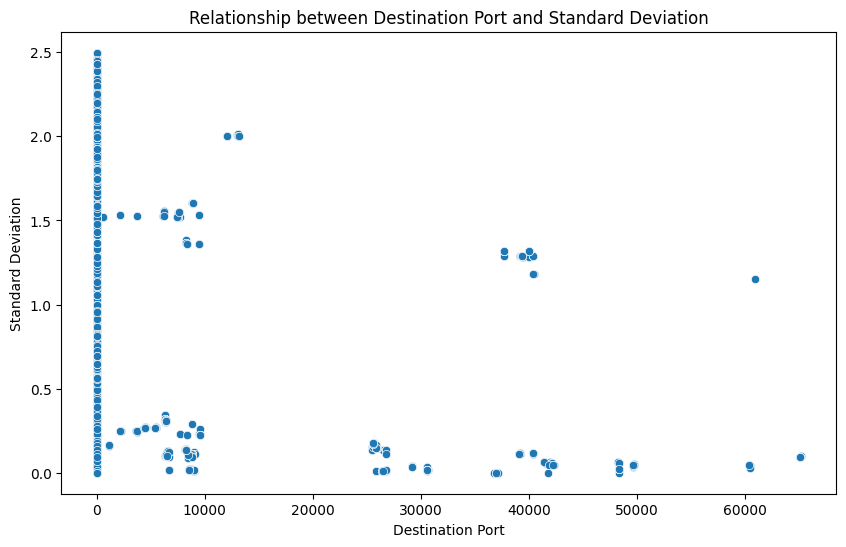

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dport', y='stddev', data=df)

plt.xlabel('Destination Port')
plt.ylabel('Standard Deviation')

plt.title('Relationship between Destination Port and Standard Deviation')

plt.show()


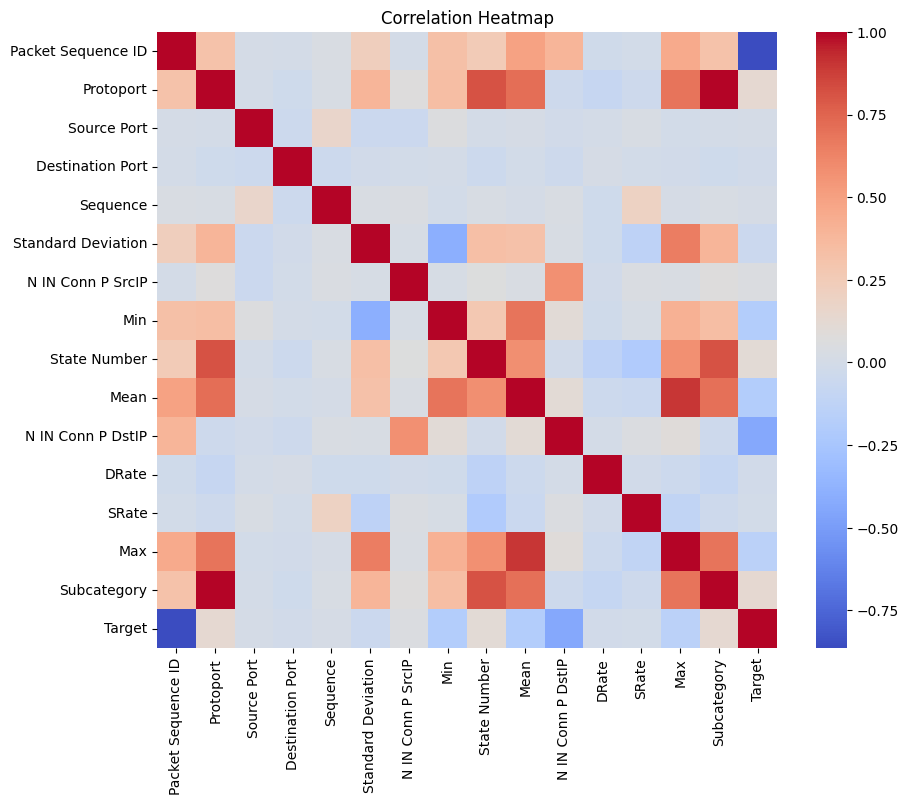

In [ ]:
column_labels = {
    'pkSeqID': 'Packet Sequence ID',
    'proto': 'Protoport',
    'sport': 'Source Port',
    'dport': 'Destination Port',
    'seq': 'Sequence',
    'stddev': 'Standard Deviation',
    'N_IN_Conn_P_SrcIP': 'N IN Conn P SrcIP',
    'min': 'Min',
    'state_number': 'State Number',
    'mean': 'Mean',
    'N_IN_Conn_P_DstIP': 'N IN Conn P DstIP',
    'drate': 'DRate',
    'srate': 'SRate',
    'max': 'Max',
    'subcategory': 'Subcategory',
    'target': 'Target'
}

corr_matrix = df.corr().rename(columns=column_labels, index=column_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()


In [ ]:
combined_df =df

In [ ]:
combined_df = combined_df.drop(columns=['pkSeqID','min','dport','sport'])

In [ ]:
feature = 'N_IN_Conn_P_SrcIP'
print(f"Summary statistics for {feature}:")
print(df[feature].describe())

Summary statistics for N_IN_Conn_P_SrcIP:
count    715413.000000
mean         82.959493
std          23.864501
min           1.000000
25%          70.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: N_IN_Conn_P_SrcIP, dtype: float64


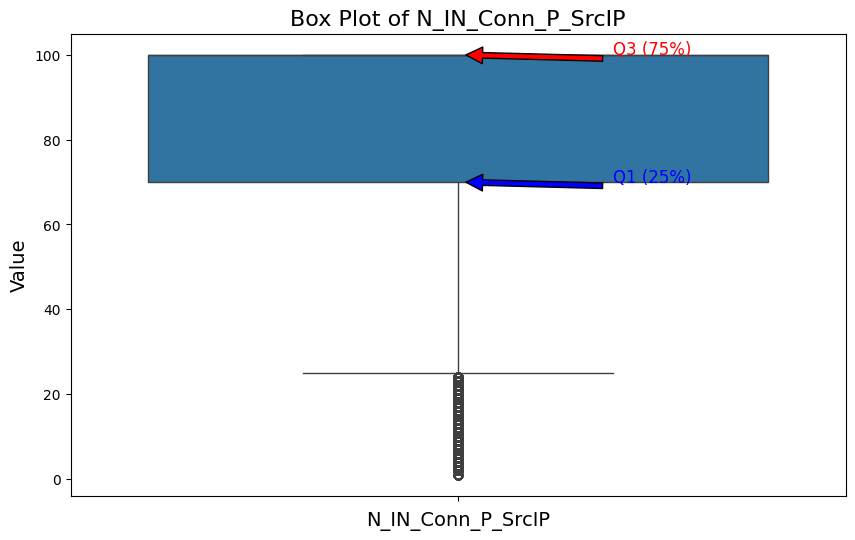

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[feature])
plt.title(f'Box Plot of {feature}', fontsize=16)
plt.xlabel('N_IN_Conn_P_SrcIP', fontsize=14)
plt.ylabel('Value', fontsize=14)

plt.annotate('Q1 (25%)', xy=(0, df[feature].quantile(0.25)), xytext=(0.2, df[feature].quantile(0.25)),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
plt.annotate('Q3 (75%)', xy=(0, df[feature].quantile(0.75)), xytext=(0.2, df[feature].quantile(0.75)),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
plt.annotate('Outliers', xy=(0, df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))),
             xytext=(0.2, df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))),
             arrowprops=dict(facecolor='purple', shrink=0.05), fontsize=12, color='purple')

plt.show()


In [ ]:
column_labels = {
    'pkSeqID': 'Packet Sequence ID',
    'sport': 'Source Port',
    'dport': 'Destination Port',
    'seq': 'Sequence',
    'stddev': 'Standard Deviation',
    'min': 'Min',
    'mean': 'Mean',
    'max': 'Max',
    'drate': 'DRate',
    'srate': 'SRate'
}

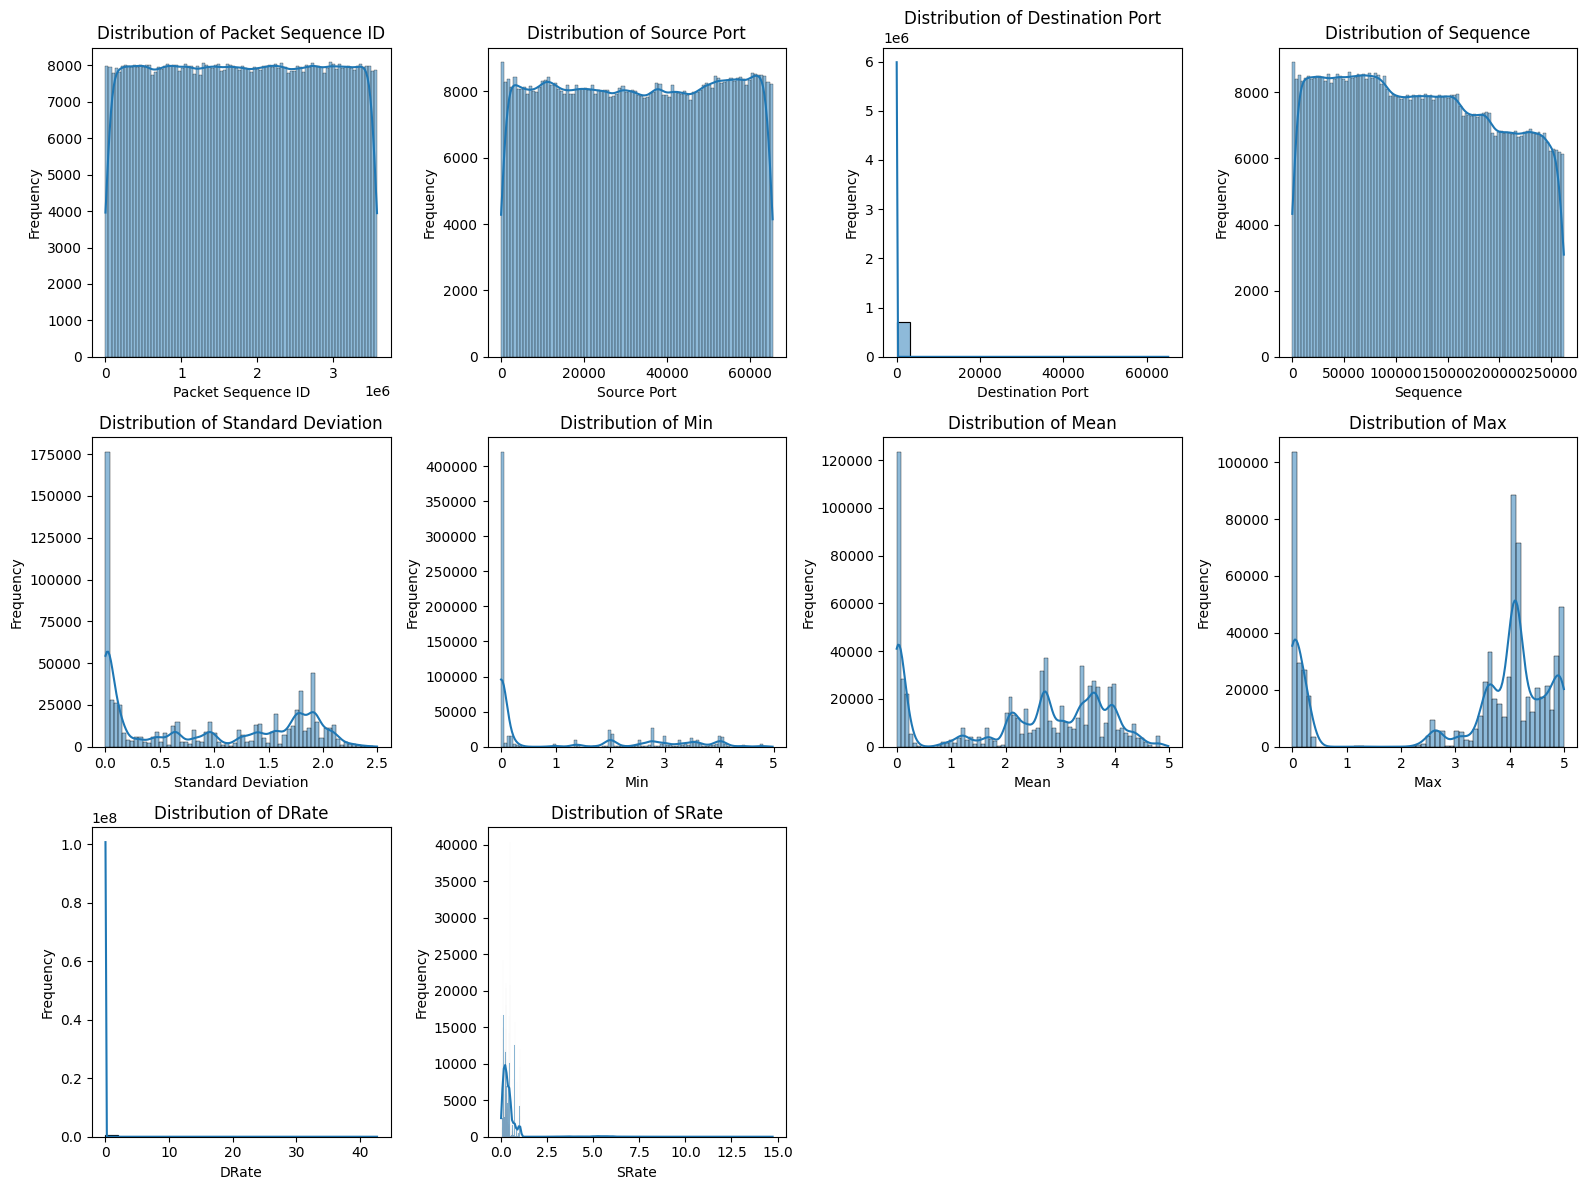

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(column_labels.keys()):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {column_labels[col]}')
    plt.xlabel(column_labels[col])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


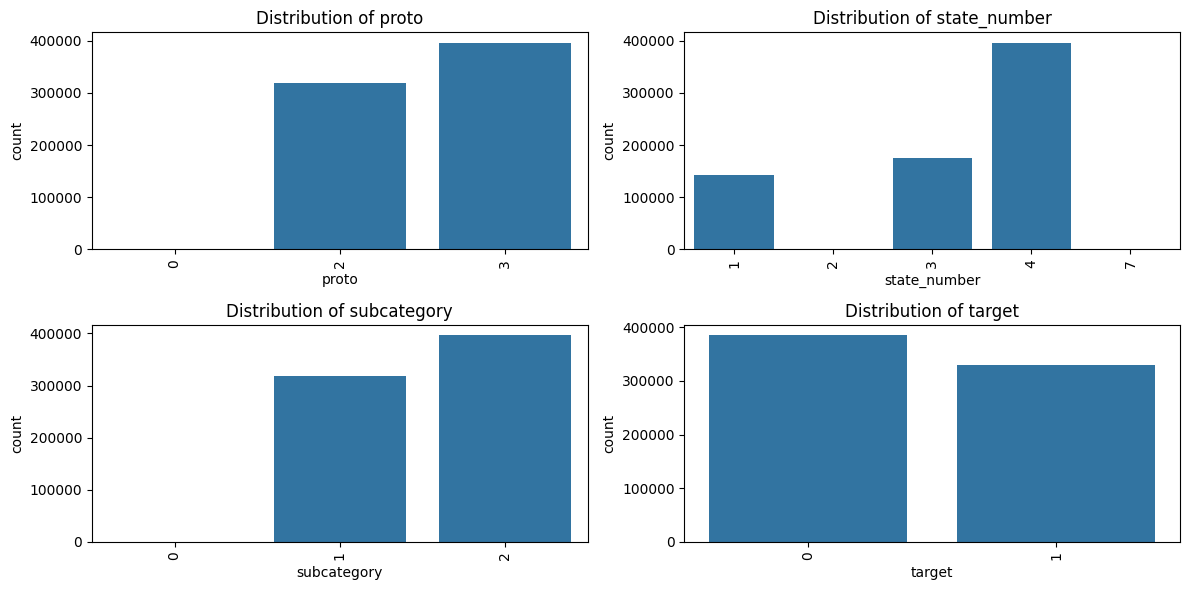

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['proto', 'state_number', 'subcategory', 'target']):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

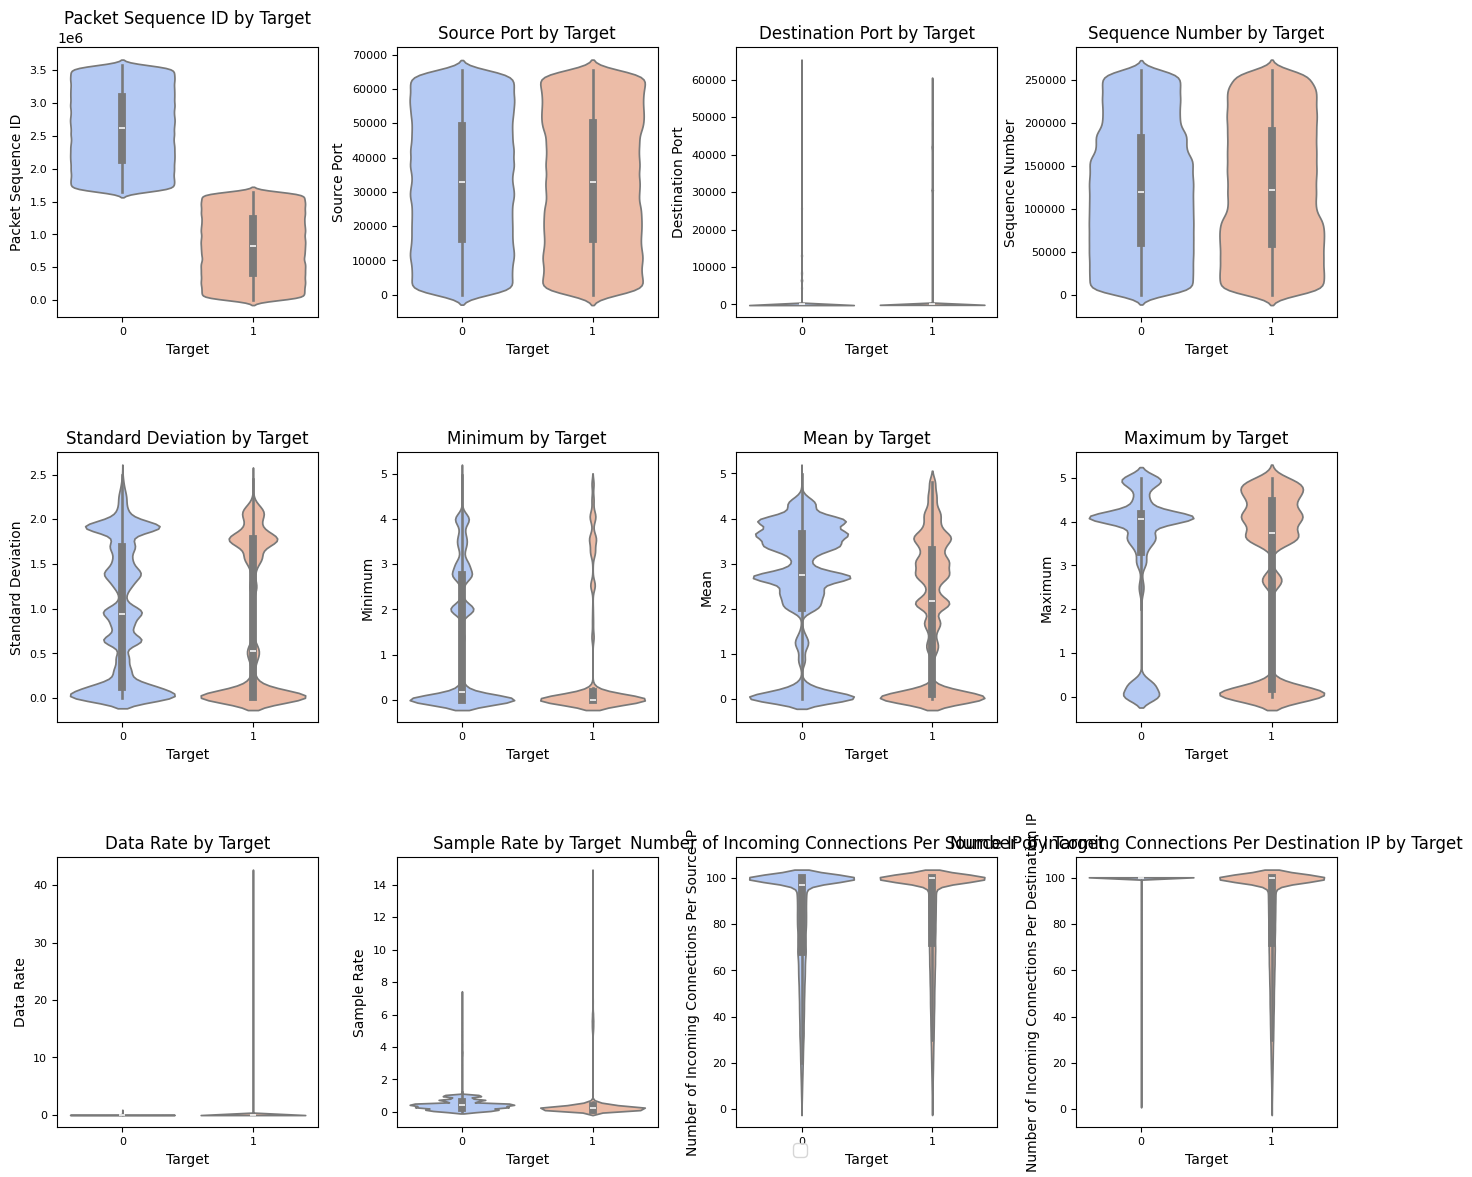

In [ ]:
column_labels = {
    'pkSeqID': 'Packet Sequence ID',
    'sport': 'Source Port',
    'dport': 'Destination Port',
    'seq': 'Sequence Number',
    'stddev': 'Standard Deviation',
    'min': 'Minimum',
    'mean': 'Mean',
    'max': 'Maximum',
    'drate': 'Data Rate',
    'srate': 'Sample Rate',
    'N_IN_Conn_P_SrcIP': 'Number of Incoming Connections Per Source IP',
    'N_IN_Conn_P_DstIP': 'Number of Incoming Connections Per Destination IP'
}

plt.figure(figsize=(16, 12))
for i, col in enumerate(column_labels.keys()):
    plt.subplot(3, 4, i+1)
    sns.violinplot(data=df, x='target', y=col, palette='coolwarm')
    plt.title(f'{column_labels[col]} by Target', fontsize=12)
    plt.xlabel('Target', fontsize=10)
    plt.ylabel(column_labels[col], fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.subplots_adjust(wspace=0.3, hspace=0.5, left=0.1, right=0.9, top=0.95, bottom=0.05)

handles, _ = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(handles, ['Target 0', 'Target 1'], loc='lower center', ncol=2, fontsize=12)
leg.set_bbox_to_anchor((0.5, 0.01))

plt.show()

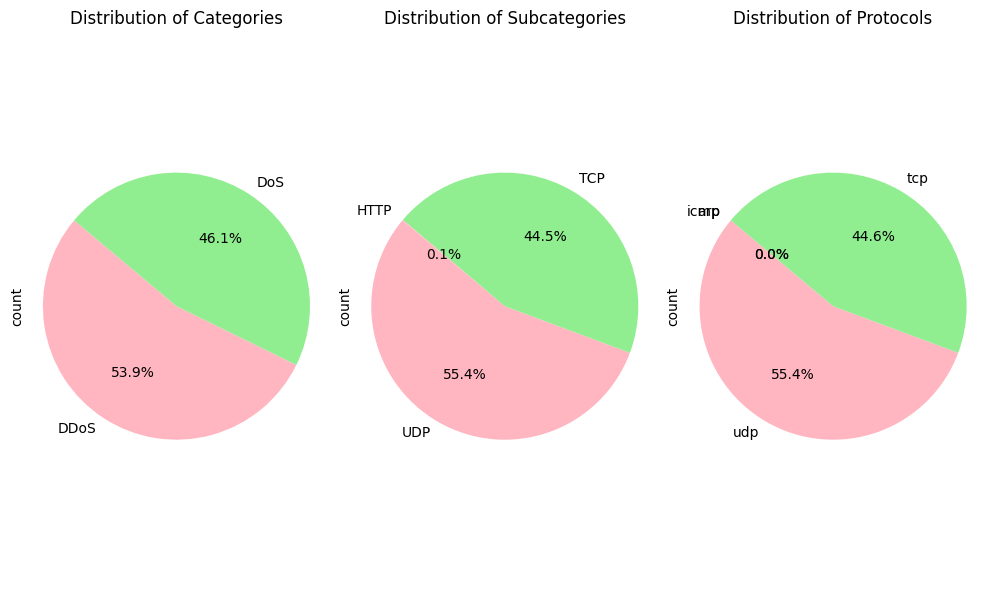

In [ ]:
colors = ['#FFB6C1', '#90EE90']

fig, axes = plt.subplots(1, 3, figsize=(10, 6))

data['category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0], colors=colors)
axes[0].set_title('Distribution of Categories')
axes[0].axis('equal')

data['subcategory'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[1], colors=colors)
axes[1].set_title('Distribution of Subcategories')
axes[1].axis('equal')

data['proto'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[2], colors=colors)
axes[2].set_title('Distribution of Protocols')
axes[2].axis('equal')

plt.tight_layout()

plt.show()

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715413 entries, 0 to 733704
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   proto              715413 non-null  int64  
 1   seq                715413 non-null  int64  
 2   stddev             715413 non-null  float64
 3   N_IN_Conn_P_SrcIP  715413 non-null  int64  
 4   state_number       715413 non-null  int64  
 5   mean               715413 non-null  float64
 6   N_IN_Conn_P_DstIP  715413 non-null  int64  
 7   drate              715413 non-null  float64
 8   srate              715413 non-null  float64
 9   max                715413 non-null  float64
 10  subcategory        715413 non-null  int64  
 11  target             715413 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 87.1 MB


*   proto: udp-3, tcp-2 arp-0
*   subcategory:udp - 2, tcp - 1, http -0
*    dos - 1, ddos - 0

In [ ]:
combined_df.head()

,proto,seq,stddev,N_IN_Conn_P_SrcIP,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory,target
0,3,175094,0.226784,100,4,4.457383,100,0.000000,0.404711,4.719438,2,1
1,2,143024,0.451998,100,1,3.806172,100,0.225077,0.401397,4.442930,1,0
2,3,167033,1.931553,73,4,2.731204,100,0.000000,0.407287,4.138455,2,0
3,2,204615,0.428798,56,1,3.626428,100,0.000000,0.343654,4.229700,1,0
4,2,40058,2.058381,100,3,1.188407,100,0.000000,0.135842,4.753628,1,1


## 4. Data Modeling

In [ ]:
target_feature = combined_df[['target']]
features = combined_df.drop(columns=['target'])

In [ ]:
target_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715413 entries, 0 to 733704
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   target  715413 non-null  int64
dtypes: int64(1)
memory usage: 27.0 MB


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715413 entries, 0 to 733704
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   proto              715413 non-null  int64  
 1   seq                715413 non-null  int64  
 2   stddev             715413 non-null  float64
 3   N_IN_Conn_P_SrcIP  715413 non-null  int64  
 4   state_number       715413 non-null  int64  
 5   mean               715413 non-null  float64
 6   N_IN_Conn_P_DstIP  715413 non-null  int64  
 7   drate              715413 non-null  float64
 8   srate              715413 non-null  float64
 9   max                715413 non-null  float64
 10  subcategory        715413 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 81.6 MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target_feature, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (572330, 11)
Shape of X_test: (143083, 11)
Shape of y_train: (572330, 1)
Shape of y_test: (143083, 1)


### Gausian Naive Bayes

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train.values.ravel())

nb_predictions = nb.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80     77072
           1       0.99      0.41      0.58     66011

    accuracy                           0.72    143083
   macro avg       0.83      0.70      0.69    143083
weighted avg       0.82      0.72      0.69    143083



### Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())
log_reg_predictions = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.60      0.74     77072
           1       0.67      0.95      0.79     66011

    accuracy                           0.77    143083
   macro avg       0.81      0.78      0.76    143083
weighted avg       0.82      0.77      0.76    143083



### XGBoost Classifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train.values.ravel())
xgb_predictions = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77072
           1       1.00      1.00      1.00     66011

    accuracy                           1.00    143083
   macro avg       1.00      1.00      1.00    143083
weighted avg       1.00      1.00      1.00    143083



### Decision Tree (ENTROPY)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')

dt.fit(X_train, y_train.values.ravel())

dt_predictions = dt.predict(X_test)

print("Decision Tree Classification Report (max_depth=5, Information Gain):")
print(classification_report(y_test, dt_predictions))

Decision Tree Classification Report (max_depth=5, Information Gain):
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     77072
           1       0.88      0.97      0.92     66011

    accuracy                           0.92    143083
   macro avg       0.92      0.92      0.92    143083
weighted avg       0.93      0.92      0.92    143083



### Decision Tree (GINI)

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')

dt_gini.fit(X_train, y_train.values.ravel())

dt_gini_predictions = dt_gini.predict(X_test)

print("Decision Tree Classification Report (max_depth=5, Gini impurity):")
print(classification_report(y_test, dt_gini_predictions))

Decision Tree Classification Report (max_depth=5, Gini impurity):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     77072
           1       0.88      0.97      0.92     66011

    accuracy                           0.92    143083
   macro avg       0.93      0.93      0.92    143083
weighted avg       0.93      0.92      0.92    143083



### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=3)

rf.fit(X_train, y_train.values.ravel())

predictions = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     77072
           1       0.93      0.92      0.92     66011

    accuracy                           0.93    143083
   macro avg       0.93      0.93      0.93    143083
weighted avg       0.93      0.93      0.93    143083



### CNN

In [ ]:
X_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("CNN Test Accuracy:", accuracy)


Epoch 1/50
16097/16097 [==============================] - 58s 4ms/step - loss: 31.3376 - accuracy: 0.6585 - val_loss: 3.6402 - val_accuracy: 0.7236
Epoch 2/50
16097/16097 [==============================] - 52s 3ms/step - loss: 1.4189 - accuracy: 0.8002 - val_loss: 0.3345 - val_accuracy: 0.8498
Epoch 3/50
16097/16097 [==============================] - 46s 3ms/step - loss: 0.3383 - accuracy: 0.8581 - val_loss: 0.2706 - val_accuracy: 0.8937
Epoch 4/50
16097/16097 [==============================] - 44s 3ms/step - loss: 0.1949 - accuracy: 0.9183 - val_loss: 0.1490 - val_accuracy: 0.9432
Epoch 5/50
16097/16097 [==============================] - 49s 3ms/step - loss: 0.1521 - accuracy: 0.9378 - val_loss: 0.1304 - val_accuracy: 0.9434
Epoch 6/50
16097/16097 [==============================] - 44s 3ms/step - loss: 0.1387 - accuracy: 0.9421 - val_loss: 0.1271 - val_accuracy: 0.9467
Epoch 7/50
16097/16097 [==============================] - 45s 3ms/step - loss: 0.1332 - accuracy: 0.9456 - val_loss: 

In [ ]:
predictions_proba = model.predict(X_test_reshaped)
predictions = (predictions_proba > 0.5).astype(int)

predictions = predictions.flatten()

print("CNN Classification Report:")
print(classification_report(y_test, predictions))

4472/4472 [==============================] - 12s 3ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     77072
           1       0.95      0.99      0.97     66011

    accuracy                           0.97    143083
   macro avg       0.97      0.97      0.97    143083
weighted avg       0.97      0.97      0.97    143083



## 5. Data Evaluation

In [ ]:
models = ['Naive Bayes', 'Logistic Regression','XGBoost', 'Decision Tree (Information Gain)',
          'Decision Tree (Gini)', 'Random Forest', 'CNN']
precision = [0.82,0.81, 1.00, 0.93, 0.93, 0.93, 0.97]
recall = [0.70, 0.78,1.00, 0.92, 0.92, 0.93, 0.97]
f1_score = [0.69, 0.76,1.00, 0.92, 0.92, 0.93, 0.97]
accuracy = [0.72, 0.77,1.00, 0.92, 0.92, 0.93, 0.97]

### Precision

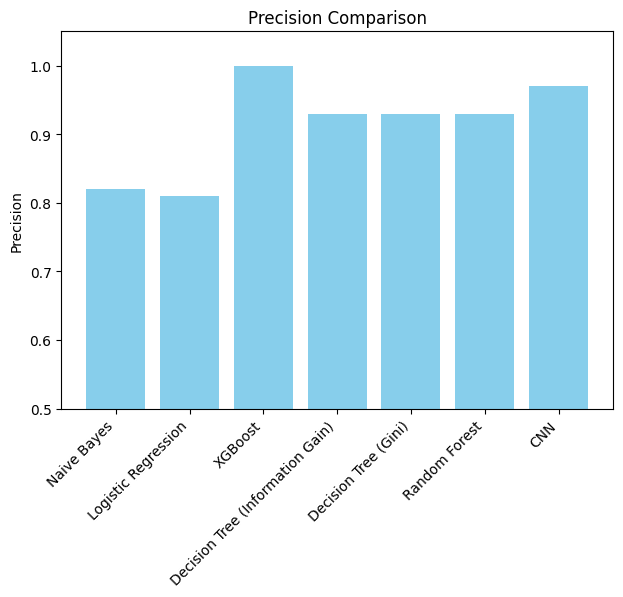

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
x_ticks = np.arange(len(models))
plt.bar(x_ticks, precision, color='skyblue')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0.5, 1.05)
plt.xticks(x_ticks, models, rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Recall

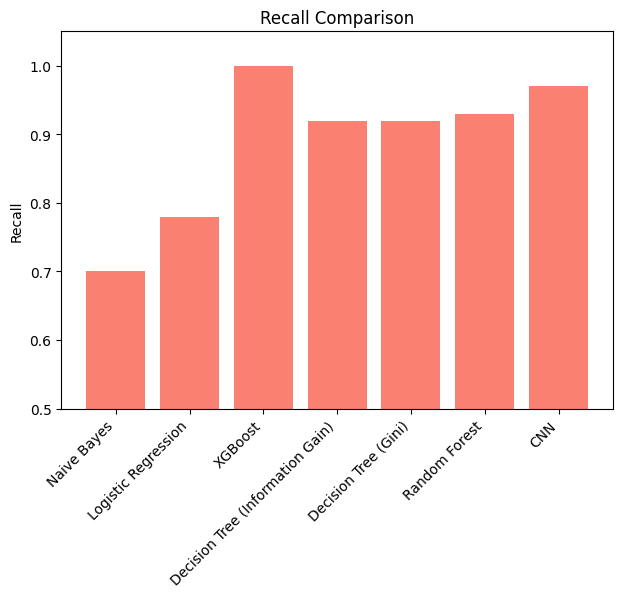

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
plt.bar(x_ticks, recall, color='salmon')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0.5, 1.05)
plt.xticks(x_ticks, models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### F1 Score

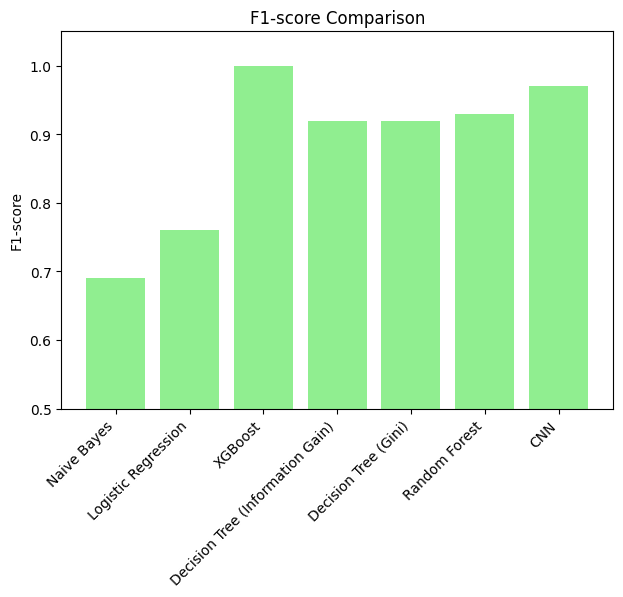

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
plt.bar(x_ticks, f1_score, color='lightgreen')
plt.title('F1-score Comparison')
plt.ylabel('F1-score')
plt.ylim(0.5, 1.05)
plt.xticks(x_ticks, models, rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Testing Accuracy

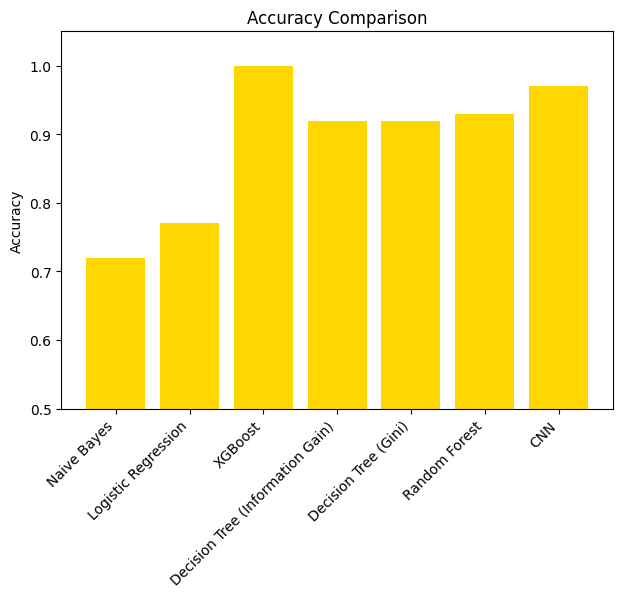

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 4)
plt.bar(x_ticks, accuracy, color='gold')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.05)
plt.xticks(x_ticks, models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 6. Hyperparameter Tuning

### Logistic Regression

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

logistic_regression_best = LogisticRegression(max_iter=1000, random_state=42, **best_params)

logistic_regression_best.fit(X_train, y_train.values.ravel())

logistic_regression_best_predictions = logistic_regression_best.predict(X_test)

print("Logistic Regression Classification Report with Best Hyperparameters:")
print(classification_report(y_test, logistic_regression_best_predictions))

Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Logistic Regression Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82     77072
           1       0.77      0.84      0.80     66011

    accuracy                           0.81    143083
   macro avg       0.81      0.81      0.81    143083
weighted avg       0.81      0.81      0.81    143083



### Decision Trees

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='f1_micro', n_jobs=-1)

grid_search_dt.fit(X_train, y_train.values.ravel())

best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree: ", best_params_dt)

dt_best = grid_search_dt.best_estimator_

dt_best_predictions = dt_best.predict(X_test)

print("Decision Tree Classification Report with Best Hyperparameters:")
print(classification_report(y_test, dt_best_predictions))


Best Hyperparameters for Decision Tree:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     77072
           1       0.92      0.91      0.92     66011

    accuracy                           0.92    143083
   macro avg       0.92      0.92      0.92    143083
weighted avg       0.92      0.92      0.92    143083



### Random Forest

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

rf_best = grid_search.best_estimator_
rf_best_predictions = rf_best.predict(X_test)
print("Random Forest Classification Report with Best Hyperparameters:")
print(classification_report(y_test, rf_best_predictions))


Best Hyperparameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5245
           1       0.98      0.98      0.98      4512

    accuracy                           0.98      9757
   macro avg       0.98      0.98      0.98      9757
weighted avg       0.98      0.98      0.98      9757



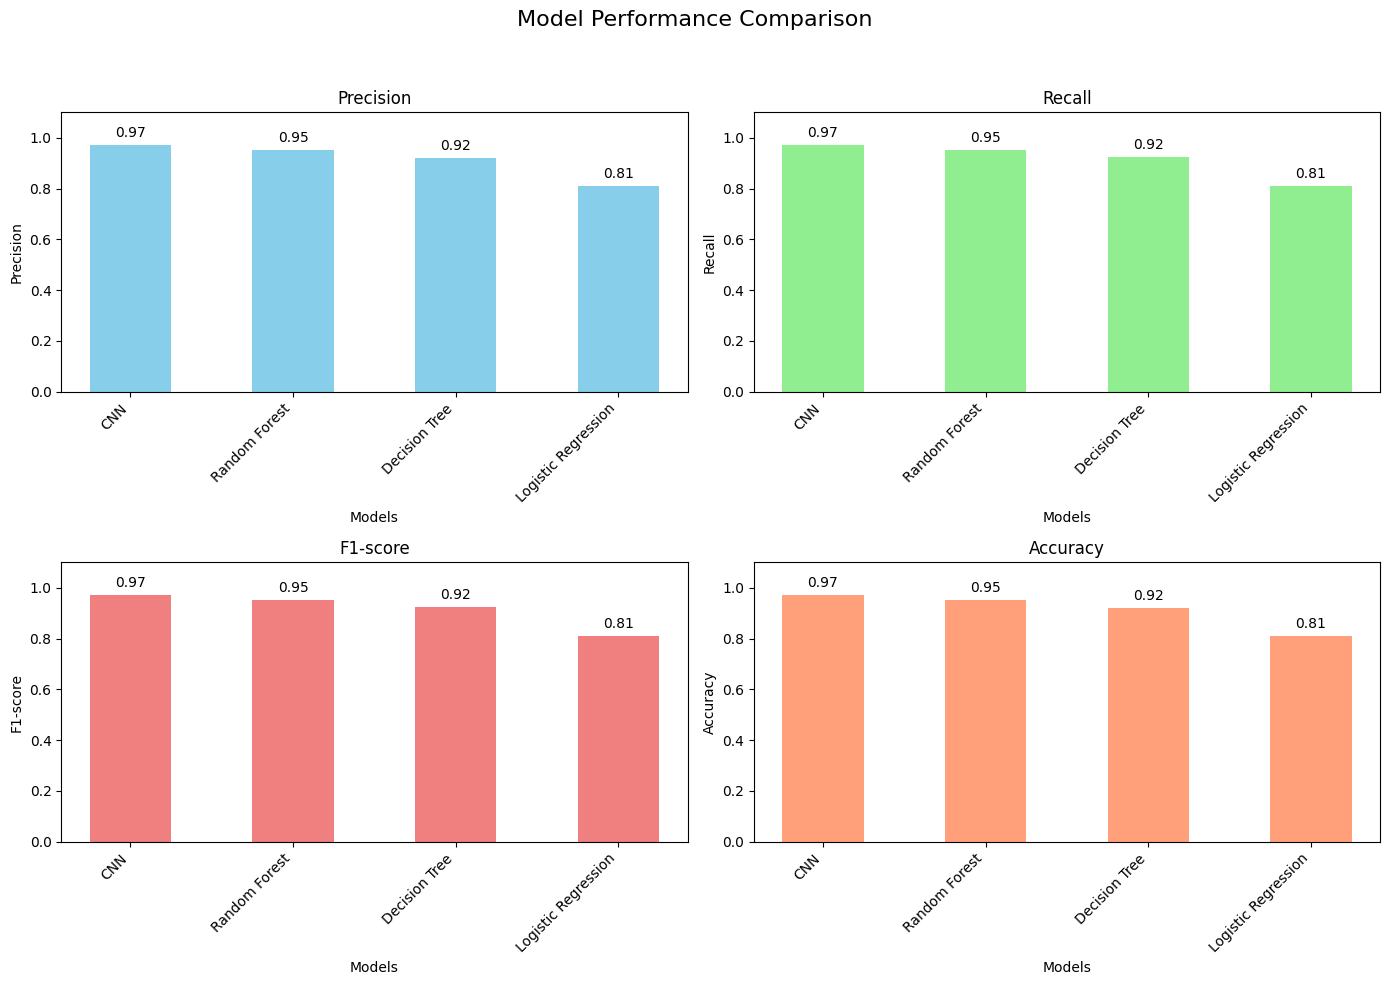

In [8]:
metrics = {
    "CNN": {"precision": [0.99, 0.95], "recall": [0.95, 0.99], "f1-score": [0.97, 0.97], "accuracy": [0.97]},
    "Random Forest": {"precision": [0.95, 0.95], "recall": [0.95, 0.95], "f1-score": [0.95, 0.95], "accuracy": [0.95]},
    "Decision Tree": {"precision": [0.92, 0.92], "recall": [0.94, 0.91], "f1-score": [0.93, 0.92], "accuracy": [0.92]},
    "Logistic Regression": {"precision": [0.85, 0.77], "recall": [0.78, 0.84], "f1-score": [0.82, 0.80], "accuracy": [0.81]},
}

avg_metrics = {model: {metric: np.mean(values) for metric, values in model_metrics.items()} for model, model_metrics in metrics.items()}

models = list(avg_metrics.keys())
metrics_list = ["precision", "recall", "f1-score", "accuracy"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

for i, metric in enumerate(metrics_list):
    ax = axes[i//2, i%2]
    ax.set_title(metric.capitalize())
    x = np.arange(len(models))
    width = 0.5

    values = [avg_metrics[model][metric] for model in models]
    bars = ax.bar(x, values, width, color=colors[i])

    ax.set_xlabel('Models')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0, 1.1)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
